In [1]:
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
tf.config.list_physical_devices('GPU')
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print("GPU is", "available" if tf.test.is_gpu_available()
     else "NOT AVAILABLE")

Tensor Flow Version: 2.1.0
Keras Version: 2.2.4-tf

Python 3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]
Pandas 1.0.1
Scikit-Learn 0.22.1
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available


In [2]:
X = tf.ones(shape=(2, 1))
print(X)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [4]:
X = tf.zeros(shape=(2, 1))
print(X)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [5]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[0.51944244]
 [0.67145574]
 [0.70556533]], shape=(3, 1), dtype=float32)


In [8]:
import numpy as np
x = np.ones(shape=(2, 2))
print(x)

[[1. 1.]
 [1. 1.]]


In [9]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.20634781],
       [ 1.3386326 ],
       [-0.5382727 ]], dtype=float32)>


In [10]:
v.assign(tf.ones((3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>


In [13]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)

In [14]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [15]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                   np.ones((num_samples_per_class, 1), dtype='float32')))

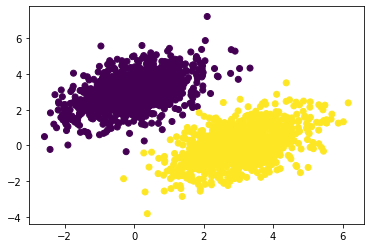

In [16]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [17]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [18]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [19]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [20]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [21]:
for step in range(20):
    loss = training_step(inputs, targets)
    print('Loss at step %d: %.4f' % (step, loss))

Loss at step 0: 2.0787
Loss at step 1: 0.3732
Loss at step 2: 0.1497
Loss at step 3: 0.1147
Loss at step 4: 0.1041
Loss at step 5: 0.0971
Loss at step 6: 0.0911
Loss at step 7: 0.0855
Loss at step 8: 0.0805
Loss at step 9: 0.0758
Loss at step 10: 0.0716
Loss at step 11: 0.0677
Loss at step 12: 0.0641
Loss at step 13: 0.0608
Loss at step 14: 0.0577
Loss at step 15: 0.0550
Loss at step 16: 0.0524
Loss at step 17: 0.0501
Loss at step 18: 0.0479
Loss at step 19: 0.0459


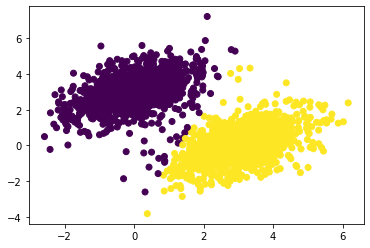

In [22]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

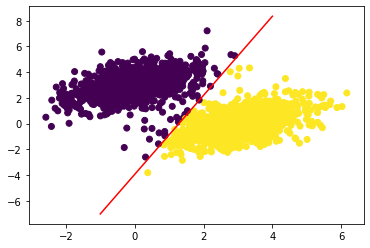

In [23]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, '-r')
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)